In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

#генерация данных
X = np.arange(100)
noise = np.random.uniform(-20, 20, size=X.shape)
Y = 5 * X + 7 + noise

In [12]:
#функция потерь (MSE)
def loss(w, b, X, Y):
    n = len(X)
    return np.sum((w * X + b - Y)**2) / (2 * n)

In [ ]:
#вычисление частных производных по w и b
def gradients(w, b, X, Y):
    n = len(X)
    dw = -np.sum(X * (Y - (w * X + b))) / n
    db = -np.sum(Y - (w * X + b)) / n
    return dw, db

In [ ]:
#инициализация параметров и гиперпараметров градиентного спуска
w, b = 0.0, 0.0 
lamda = 0.0001
tol = 0.001
max_iter = 100000

In [3]:
#градиентный спуск
for i in range(max_iter):
    dw, db = gradients(w, b, X, Y)
    w_new = w - lamda * dw
    b_new = b - lamda * db
    
    if np.sqrt((w_new - w)**2 + (b_new - b)**2) < tol:
        w, b = w_new, b_new
        break
    w, b = w_new, b_new

print("Результат градиентного спуска: w =", w, "b =", b)
print("Финальное значение функции потерь:", loss(w, b, X, Y))

Результат градиентного спуска: w = 5.06049269440215 b = 0.08179399865186236
Финальное значение функции потерь: 77.13295338849312


In [4]:
#линейная регрессия с использованием np.polyfit для сравнения
w_lin, b_lin = np.polyfit(X, Y, 1)
print("Результат np.polyfit: w =", w_lin, "b =", b_lin)

Результат np.polyfit: w = 4.898941944982043 b = 10.914127303889586


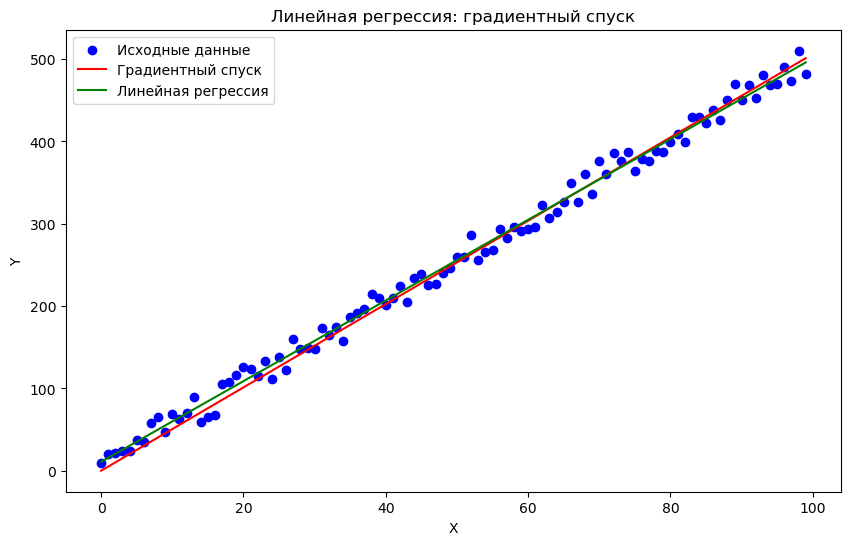

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Исходные данные", color="blue")
x_line = np.linspace(0, 99, 100)
plt.plot(x_line, w * x_line + b, 'r-', label="Градиентный спуск")
plt.plot(x_line, w_lin * x_line + b_lin, 'g-', label="Линейная регрессия")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия: градиентный спуск")
plt.legend()
plt.show()